In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the graph from a GraphML file
graph = nx.read_graphml('Network.graphml')
# Calculate the degree of each node in the graph
degrees = dict(graph.degree())

In [4]:
# Open a file in write mode
with open('degrees_output.txt', 'w') as file:
    for user, degree in degrees.items():
        output = f'Degree of {user}: {degree}\n'  # Add a newline character at the end
        file.write(output)  # Write the output to the file

In [5]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
degree_counts = np.bincount(degree_sequence)
total_nodes = graph.number_of_nodes()

In [10]:
# Open a file in write mode
with open('degree_distribution.txt', 'w') as file:
    file.write('Degree distribution:\n')
    for degree, count in enumerate(degree_counts):
        if count > 0:
            fraction = count / total_nodes
            output = f'Degree {degree}: Fraction of nodes = {fraction:.6f}\n'
            file.write(output)

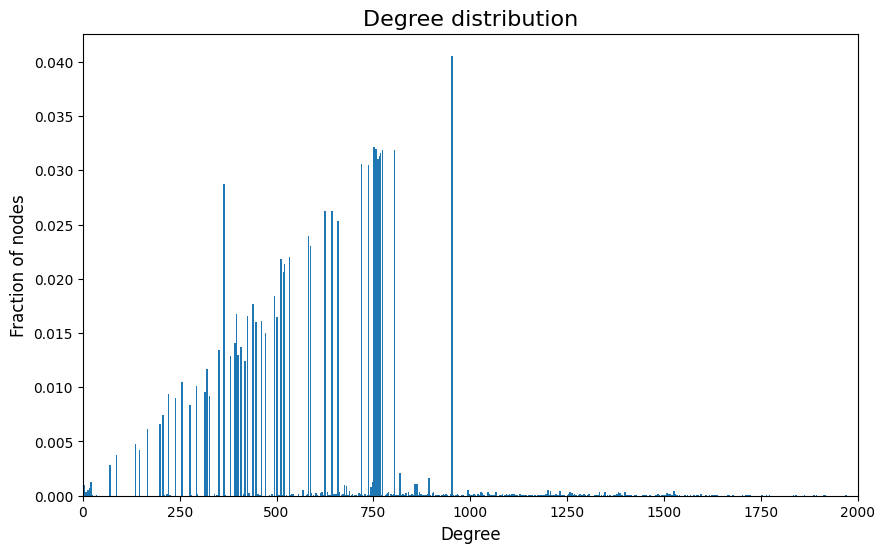

In [17]:
# Plot a degree distribution graph using a histogram

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
hist, bins = np.histogram(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2, 1))
hist = hist.astype(float) / hist.sum()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.bar(bins[:-1], hist, width=4)
plt.xlim(min(bins), 2000)  # Set the x-axis range from min(bins) to 2000
plt.title("Degree distribution", fontsize=16)  # Increase the title font size
plt.ylabel("Fraction of nodes", fontsize=12)  # Increase the y-axis label font size
plt.xlabel("Degree", fontsize=12)  # Increase the x-axis label font size
plt.tick_params(axis='both', labelsize=10)  # Increase the tick label font size

plt.savefig("degree_distribution.png", dpi=300)  # Save the plot as an image file with higher resolution
plt.show()